In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

the dataset first needed to be filtered per transportmode and region. New dataset was created for the total yearly kilometres for all transport modes, car users and train users. The data for car drivers and car passenger are summed for the car users, because it is given in seperate sets. After the filtering there are three new dataframes. In these dataframes the data is oredened by year and represent the total kilometres travelled per year. The last step is to change the index names so it refers to the years. The total kilometres can then be plotted agianst the year for all transport modes, car users and train users. The first two rows have names to order the data per province and per transport modes, so for the plots it is neccesary to skip the first two rows by only select the data points out of the set. 

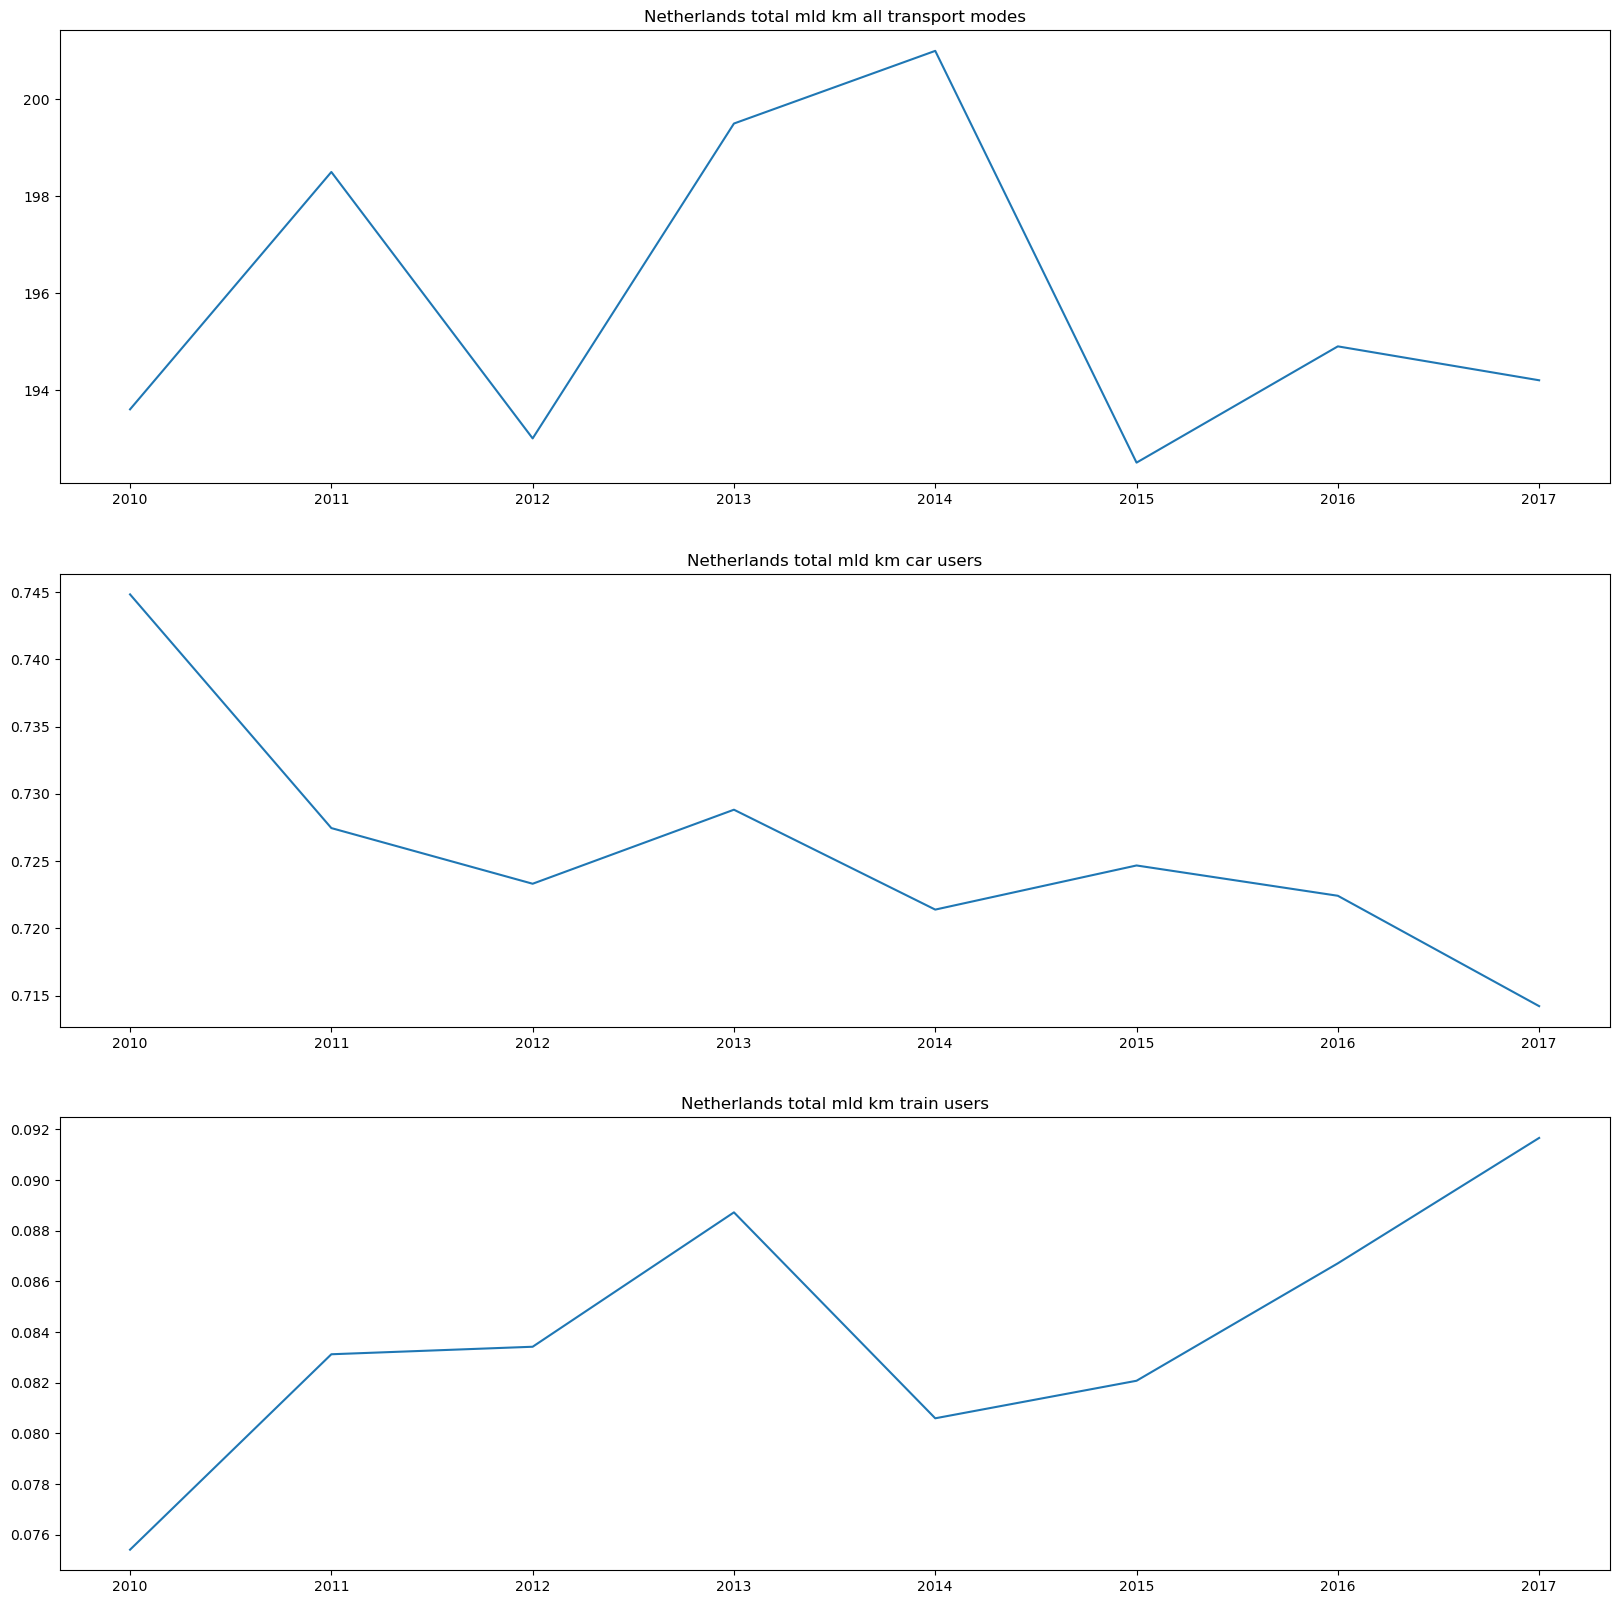

In [119]:
data = pd.read_csv("total_kilometers.csv", delimiter=';', decimal=',', skiprows=5)
#Data for the Netherlands:
tot = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Nederland'])].transpose() #total km's per year for all transport modes
car = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) & 
       data["Regio's"].isin(['Nederland']) ].reset_index(drop=True).transpose() + 
       data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
       data["Regio's"].isin(['Nederland']) ].reset_index(drop=True).transpose() 
      ) #total km's per year for car as driver and passenger
train = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Nederland'])].reset_index(drop=True).transpose() #total km's per year for train passengers in the Netherlands
tot.index = [0, 0, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017] #change index names, because names are 'mld km.1' instead of the years; first two rows are a list of names which are referring to transport mode and province
car.index = train.index = tot.index 

# display(tot) #display to check table forms of new dataframes
# display(car[13]+car2[26])
# display(train[39])

#figures for the Netherlands
plt.figure(figsize=(20, 20))
plt.subplot(3,1,1)
plt.title('Netherlands total mld km all transport modes')
plt.plot(tot.iloc[2:,:]) #plot for total km's in Netherlands; iloc is for filtering the first two rows which are names and no values
plt.subplot(3,1,2)
plt.title('Netherlands total mld km car users')
plt.plot(car.iloc[2:,:] / tot.iloc[2:,:]) #plot for total km's for car drivers and passengers in the Netherlands devided by total km
plt.subplot(3,1,3)
plt.title('Netherlands total mld km train users')
plt.plot(train.iloc[2:,:] / tot.iloc[2:,:]) #plot for total km's for train passengers in the Netherlands devided by total km

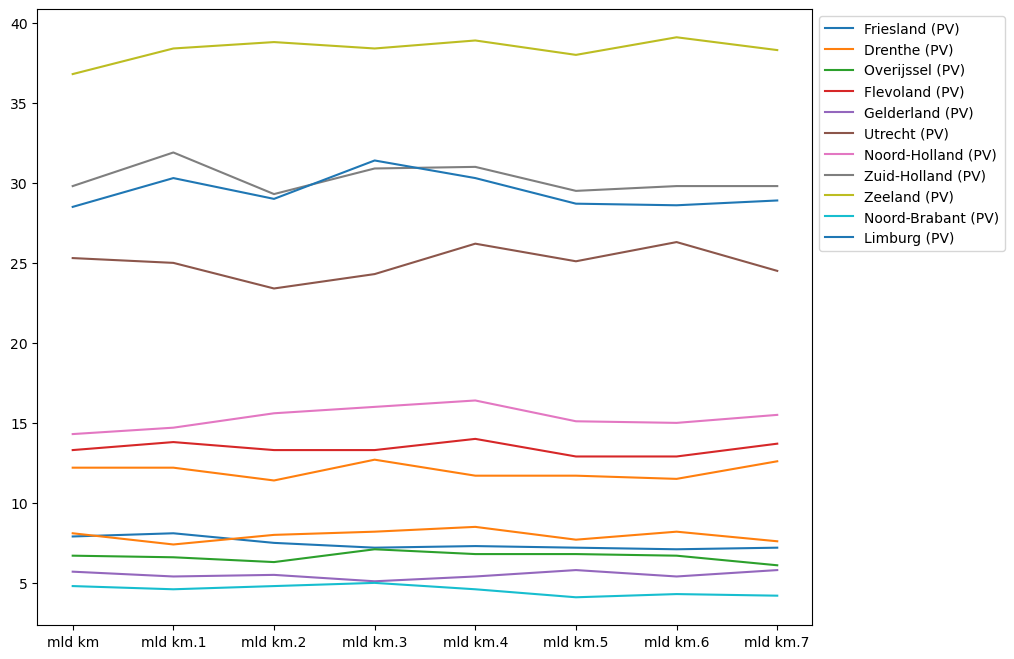

In [87]:
tot = data[ data['Vervoerwijzen'].isin(['Totaal'])].transpose()
plt.figure(figsize=(10,8))
# plt.subplot(2,1,1)
plt.plot(tot.iloc[2:,1:])
plt.legend(tot.iloc[1, 2:], loc='upper left', bbox_to_anchor=(1,1))

# car = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) 
#        ].reset_index(drop=True).transpose() + 
#        data[ data['Vervoerwijzen'].isin(['Auto (passagier)'])
#        ].reset_index(drop=True).transpose() 
#       ) #total km's per year for car as driver and passenger
# plt.subplot(2,1,2)
# plt.plot(car.iloc[2:,1:])
# plt.legend(tot.iloc[1, 2:], loc='upper left', bbox_to_anchor=(1,1))

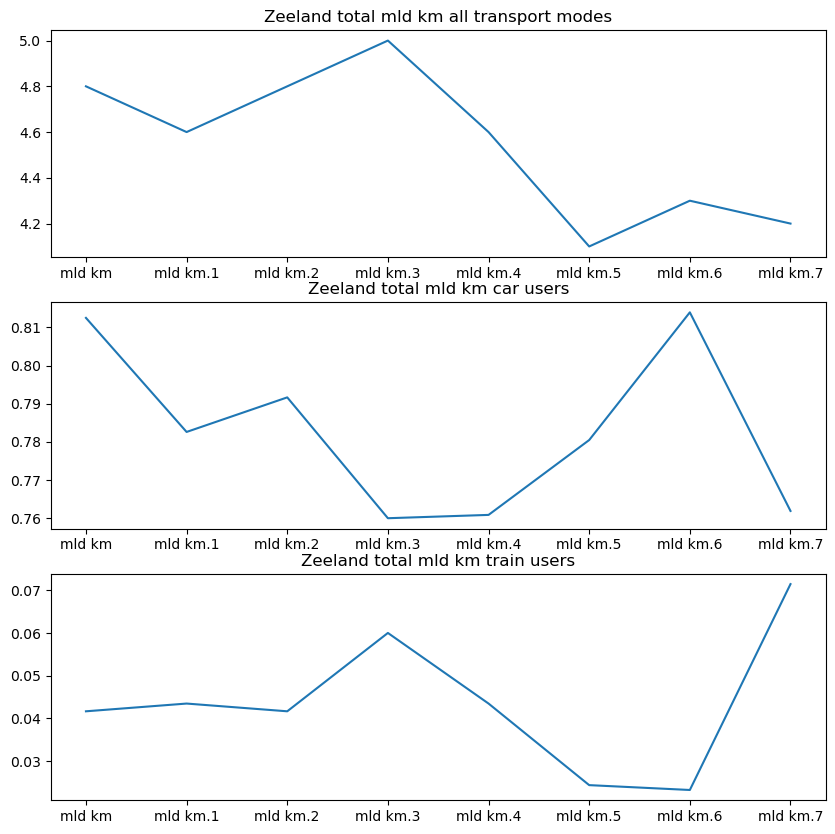

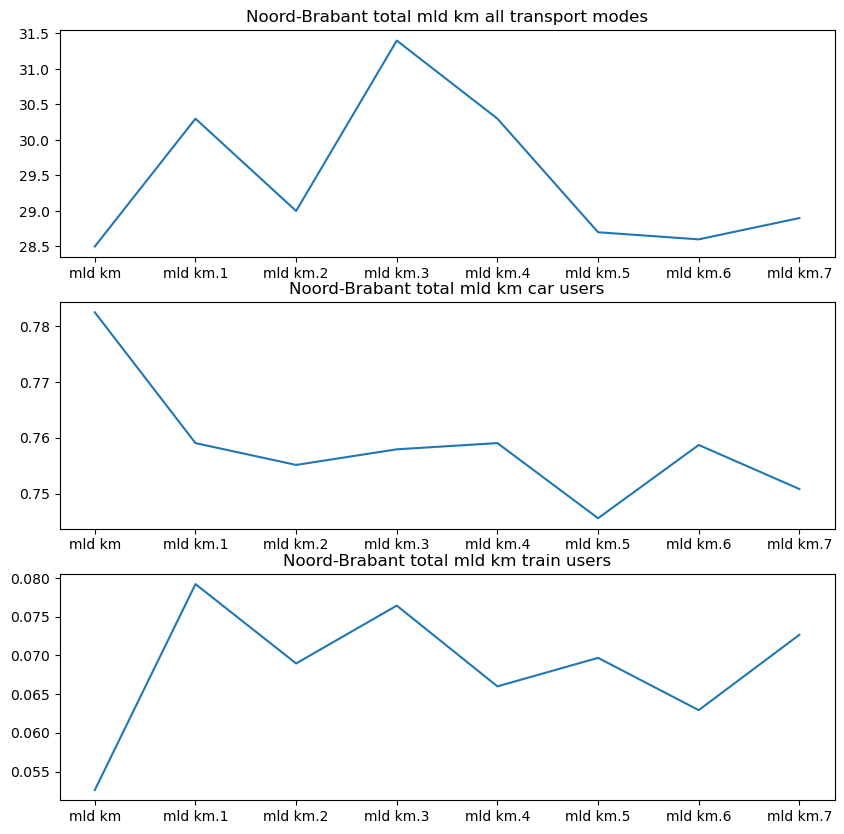

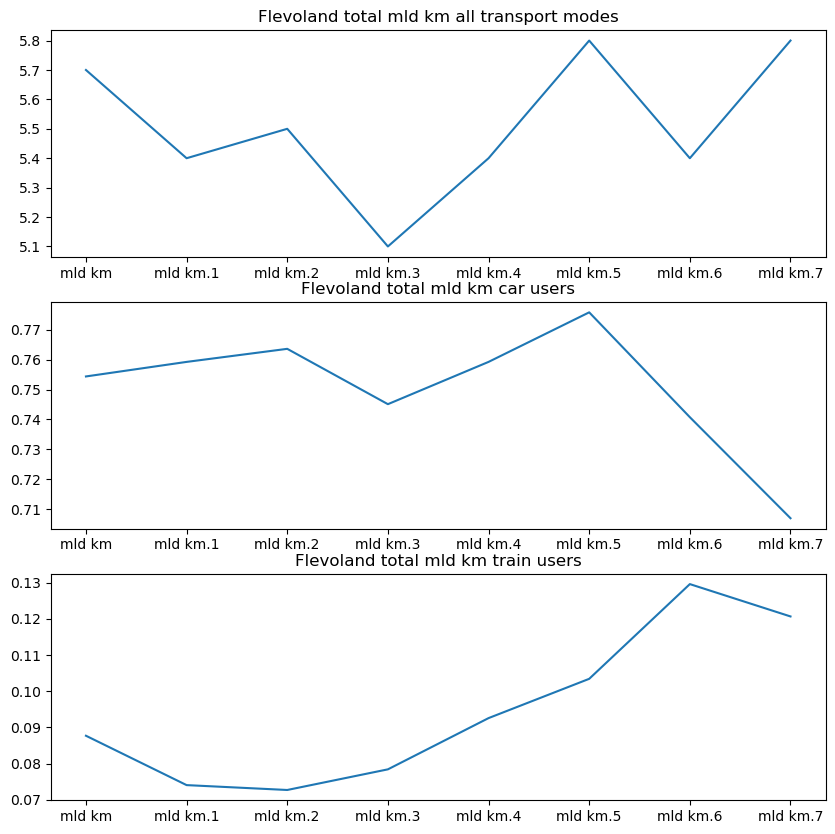

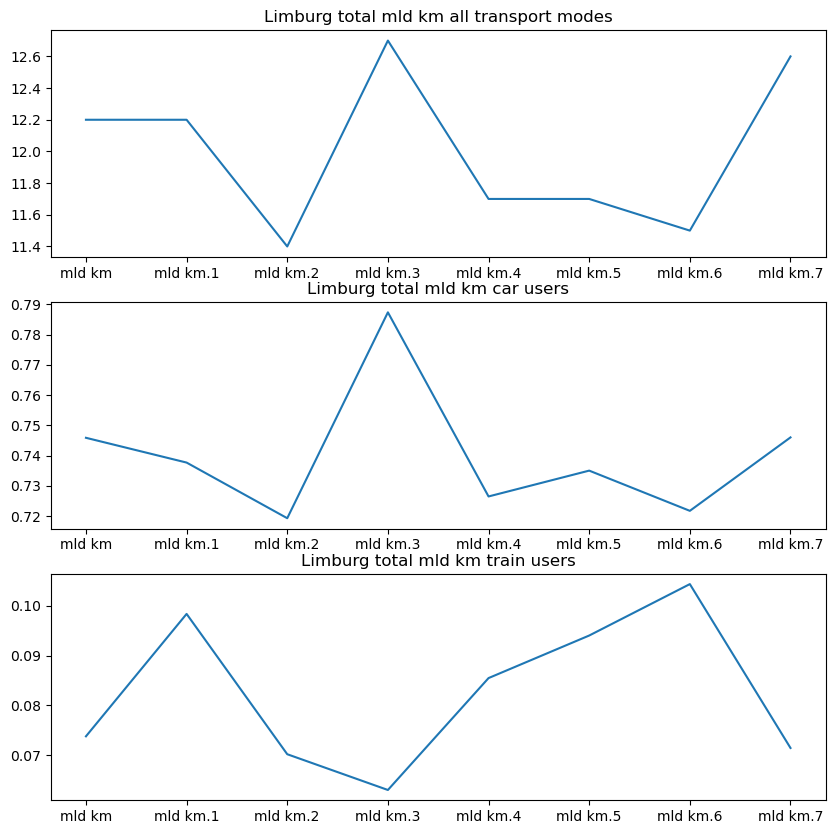

In [88]:
# Data for the province of Zeeland
totZl = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Zeeland (PV)'])].reset_index(drop=True).transpose() #filtering the data for Zeeland
carZl = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) & 
         data["Regio's"].isin(['Zeeland (PV)']) ].reset_index(drop=True).transpose() + 
         data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
         data["Regio's"].isin(['Zeeland (PV)']) ].reset_index(drop=True).transpose() 
        )
trainZl = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Zeeland (PV)'])].reset_index(drop=True).transpose()
totZl.index = carZl.index = trainZl.index = tot.index

#figures for Zeeland
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
plt.title('Zeeland total mld km all transport modes')
plt.plot(totZl.iloc[2:,:]) #plot for total km's in Zeeland
plt.subplot(3,1,2)
plt.title('Zeeland total mld km car users')
plt.plot(carZl.iloc[2:,:] / totZl.iloc[2:,:]) #plot for total km's for car drivers and passengers in Zeeland devided by total km
plt.subplot(3,1,3)
plt.title('Zeeland total mld km train users')
plt.plot(trainZl.iloc[2:,:] / totZl.iloc[2:,:] ) #plot for total km's for train passengers in Zeeland devided by total km


#data for the province of Noord-Brabant
totGR = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Noord-Brabant (PV)'])].reset_index(drop=True).transpose() #filtering the data for Noord-Brabant
carGR = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) &
            data["Regio's"].isin(['Noord-Brabant (PV)']) ].reset_index(drop=True).transpose() + 
            data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
            data["Regio's"].isin(['Noord-Brabant (PV)']) ].reset_index(drop=True).transpose() 
        )
trainGR = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Noord-Brabant (PV)'])].reset_index(drop=True).transpose()
totGR.index = carGR.index = trainGR.index = tot.index

#figures for Noord-Brabant
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title('Noord-Brabant total mld km all transport modes')
plt.plot(totGR.iloc[2:,:]) #plot for total km's in Noord-Brabant
plt.subplot(3,1,2)
plt.title('Noord-Brabant total mld km car users')
plt.plot(carGR.iloc[2:,:] / totGR.iloc[2:,:]) #plot for total km's in for car drivers and passengers in Noord-Brabant devided by total km
plt.subplot(3,1,3)
plt.title('Noord-Brabant total mld km train users')
plt.plot(trainGR.iloc[2:,:] / totGR.iloc[2:,:]) #plot for total km's for train passengers in the Noord-Brabant devided by total km

#Data for the province of Flevoland
totFl = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Flevoland (PV)'])].reset_index(drop=True).transpose() #filtering the data for Flevoland
carFl = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) & 
         data["Regio's"].isin(['Flevoland (PV)']) ].reset_index(drop=True).transpose() + 
         data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
         data["Regio's"].isin(['Flevoland (PV)']) ].reset_index(drop=True).transpose() 
        )
trainFl = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Flevoland (PV)'])].reset_index(drop=True).transpose()
totFl.index = carFl.index = trainFl.index = tot.index

#figures for Flevoland
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
plt.title('Flevoland total mld km all transport modes')
plt.plot(totFl.iloc[2:,:]) #plot for total km's in Flevoland
plt.subplot(3,1,2)
plt.title('Flevoland total mld km car users')
plt.plot(carFl.iloc[2:,:] / totFl.iloc[2:,:]) #plot for total km's for car drivers and passengers in Flevoland devided by total km
plt.subplot(3,1,3)
plt.title('Flevoland total mld km train users')
plt.plot(trainFl.iloc[2:,:] / totFl.iloc[2:,:] ) #plot for total km's for train passengers in Flevoland devided by total km

#Data for the province of Limburg
totFl = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Limburg (PV)'])].reset_index(drop=True).transpose() #filtering the data for Limburg
carFl = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) & 
         data["Regio's"].isin(['Limburg (PV)']) ].reset_index(drop=True).transpose() + 
         data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
         data["Regio's"].isin(['Limburg (PV)']) ].reset_index(drop=True).transpose() 
        )
trainFl = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Limburg (PV)'])].reset_index(drop=True).transpose()
totFl.index = carFl.index = trainFl.index = tot.index

#figures for Limburg
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
plt.title('Limburg total mld km all transport modes')
plt.plot(totFl.iloc[2:,:]) #plot for total km's in Limburg
plt.subplot(3,1,2)
plt.title('Limburg total mld km car users')
plt.plot(carFl.iloc[2:,:] / totFl.iloc[2:,:]) #plot for total km's for car drivers and passengers in Limburg devided by total km
plt.subplot(3,1,3)
plt.title('Limburg total mld km train users')
plt.plot(trainFl.iloc[2:,:] / totFl.iloc[2:,:] ) #plot for total km's for train passengers in Limburg devided byLimburg